In [15]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_parquet('./data/sillok_finetune.parquet', engine='pyarrow')
df1.head()

,king,king_order,year,relative_year,month,entry_order,original_text,translated_text
0,태조,1,NaN,NaN,총서,1.0,"太祖康獻至仁啓運聖文神武大王, 姓李氏, 諱旦, 字君晋, 古諱成桂, 號松軒, 全州大姓也...",태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏...
1,태조,1,NaN,NaN,총서,2.0,"○明年乙卯, 散吉聞于元帝, 元爲立斡東千戶所, 給降金牌, 爲南京等處五千戶所, 首千戶、...","명년 을묘(1255)에 산길이 이 사실을 원(元)나라 황제에게 알리니, 원나라에서 ..."
2,태조,1,NaN,NaN,총서,3.0,"○斡東東南三十餘里, 有海島曰者考羅, 北連於陸。 穆祖築石城, 以放牛馬。","알동의 동남쪽 30여 리에 해도(海島)가 있는데, 자고라(者考羅)라고 한다. 북쪽으..."
3,태조,1,NaN,NaN,총서,4.0,"○憲宗八年, 受散吉令旨, 管領李春、文大純、趙奧、魯哥兒、卓靑、尙哉、光奕、張哥等八介百戶...","〈원나라〉 헌종(憲宗) 8년(1258)에 산길(散吉)의 영지(令旨)를 받아, 이춘(..."
4,태조,1,NaN,NaN,총서,5.0,"○世祖皇帝 中統二年辛酉六月, 尙書省給降本所行使銅印。",세조 황제(世祖皇帝) 중통(中統) 2년(1261) 신유 6월에 상서성(尙書省)에서 ...


In [3]:
df1['year'].value_counts()

year
1618.0    5235
1612.0    4061
1613.0    3720
1616.0    3440
1617.0    3260
          ... 
1607.0      54
1586.0      47
1571.0      43
1582.0      37
1928.0       7
Name: count, Length: 372, dtype: int64

In [13]:
df1['relative_year'].unique().astype(int)

/var/folders/l4/xcb152_d5v51k4kx19t42f0w0000gn/T/ipykernel_36170/1582849484.py:1: RuntimeWarning: invalid value encountered in cast
  df1['relative_year'].unique().astype(int)


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18, 1418,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32, 1450, 1468, 1469,   33,   34,   35,   36,   37,   38,   39,
       1545, 1567,   40,   41, 1608, 1649, 1659, 1674,   42,   43,   44,
         45,   46, 1720, 1863, 1907])

In [5]:
df1['month'].unique()

array(['총서', '7월', '8월', '9월', '10월', '11월', '12월', '윤12월', '1월', '2월',
       '3월', '4월', '5월', '6월', '윤9월', '윤5월', '윤3월', '윤11월', '윤7월', '윤4월',
       '윤1월', '윤8월', '윤6월', '윤2월', '윤10월'], dtype=object)

In [6]:
len(df1)

308554

In [7]:
df1['original_text'].sample(1).iloc[0]

'○庚戌/次松折院, 鐵原人安得命拜于道左, 年八十, 賜木緜衣一領。'

In [8]:
df1['original_text'].str.len().describe()

count    308554.000000
mean        215.600537
std        1404.764642
min           2.000000
25%          22.000000
50%          73.000000
75%         200.000000
max      361261.000000
Name: original_text, dtype: float64

In [9]:
(df1['original_text'].str.len() > 5000).mean()

0.0016625939057668998

In [14]:
(df1['translated_text'].str.len() > 5000).mean()

0.008789385326393435

In [16]:
np.corrcoef(df1['original_text'].str.len(), df1['translated_text'].str.len())

array([[1.        , 0.54443249],
       [0.54443249, 1.        ]])

In [ ]:
df1[df1['original_text'].str.len() < 1000]['translated_text'].str.len().describe()

In [19]:
df1[df1['original_text'].str.len() < 500]['translated_text'].str.len().describe()

count    280374.000000
mean        268.493751
std         325.297855
min           0.000000
25%          46.000000
50%         139.000000
75%         373.000000
max       10633.000000
Name: translated_text, dtype: float64

In [10]:
df1['translated_text'].str.len().describe().astype(int)

count     308554
mean         516
std         3006
min            0
25%           52
50%          170
75%          510
max      1232042
Name: translated_text, dtype: int64

<Axes: >

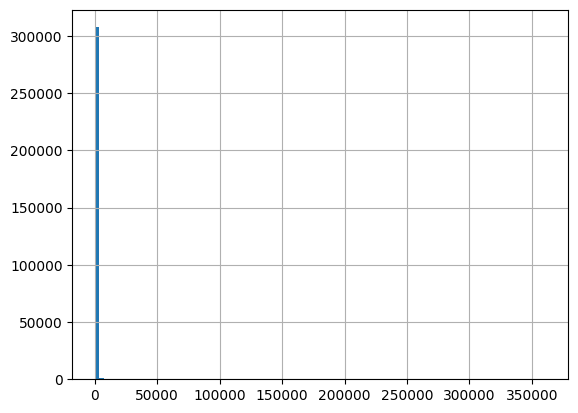

In [11]:
df1['original_text'].str.len().hist(bins=100)

<Axes: >

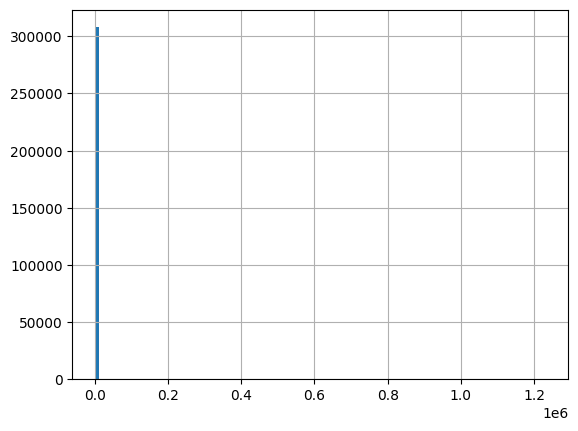

In [12]:
df1['translated_text'].str.len().hist(bins=100)